In [4]:
import xarray as xr

# เปิดไฟล์ NetCDF
ds = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# แปลงหน่วยจาก m เป็น mm โดยการคูณ 1000
#ds['tp'] = ds['tp'] * 1000

# ตรวจสอบ attributes ใหม่
print(ds['tp'].attrs)

# # ดูค่า attribute ของ dataset
# print("Dataset attributes:")
# print(ds.attrs)

# # ตรวจสอบค่า frequency
# frequency = ds.attrs.get('frequency', 'Unknown')
# print(f"\nFrequency of the dataset: {frequency}")

# # ดูช่วงเวลาของปี 1960
# data_1960 = ds.sel(time=slice('1960-01-01', '1960-12-31'))
# print("\nTime range for 1960:")
# print(data_1960.time.values)


{'long_name': 'Total precipitation', 'units': 'm', 'cell_methods': 'time: sum'}


In [ ]:
#นับจำนวน frequency ของ grid ทุก dataset
import xarray as xr

# เปิดไฟล์ NetCDF
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")


# ดูค่า attribute ของ dataset
print("Dataset attributes:")
print(ds.attrs)

# ตรวจสอบค่า frequency
frequency = ds.attrs.get('frequency', 'Unknown')
print(f"\nFrequency of the dataset: {frequency}")

# เลือกข้อมูลตัวแปร tmin สำหรับปี 1960
data_1960 = ds['mn2t'].sel(time=slice('1960-01-01', '1960-12-31'))

# เลือกตำแหน่ง grid ที่ต้องการ
# ตัวอย่างนี้เลือก grid แรก (latitude และ longitude แรก)
latitude = ds.latitude[0].item()
longitude = ds.longitude[0].item()

print(f"\nSelected grid location - Latitude: {latitude}, Longitude: {longitude}")

# ดึงข้อมูลสำหรับ grid ที่เลือก
grid_data_1960 = data_1960.sel(latitude=latitude, longitude=longitude, method='nearest')

# แปลงค่าจากเคลวินเป็นองศาเซลเซียส
grid_data_1960_celsius = grid_data_1960 - 273.15

# แสดงข้อมูลทั้งหมดของ grid ที่เลือกในปี 1960
print("\nData for the selected grid in 1960 (in Celsius):")
print(grid_data_1960_celsius.values)



In [16]:
import xarray as xr

# เปิดไฟล์ NetCDF
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

datasets = {
    'Tmax': ds_tmax,
    'Tmin': ds_tmin,
    'Precipitation': ds_pr
}

# ตรวจสอบจำนวน frequency สำหรับทุกกริดในแต่ละ dataset
for name, ds in datasets.items():
    # เลือกข้อมูลตัวแปรและปี 1960
    data_1960 = ds.sel(time=slice('1960-01-01', '1960-12-31'))
    
    # เลือกตำแหน่ง grid แรก (latitude และ longitude แรก)
    latitude = ds.latitude[0].item()
    longitude = ds.longitude[0].item()
    
    # ดึงข้อมูลสำหรับ grid ที่เลือก
    grid_data_1960 = data_1960.sel(latitude=latitude, longitude=longitude, method='nearest')
    
    # นับจำนวน frequency (จำนวนวันในปี 1960)
    frequency_count = grid_data_1960.time.size
    
    print(f"\nFrequency count for {name} dataset at grid (Lat: {latitude}, Lon: {longitude}): {frequency_count} days")



Frequency count for Tmax dataset at grid (Lat: 22.0, Lon: 95.0): 366 days

Frequency count for Tmin dataset at grid (Lat: 22.0, Lon: 95.0): 366 days

Frequency count for Precipitation dataset at grid (Lat: 22.0, Lon: 95.0): 366 days


In [2]:
import xarray as xr

# เปิดไฟล์ NetCDF
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# กำหนดตัวแปรที่ต้องการดึงข้อมูลจากแต่ละ dataset
datasets = {
    'Tmax': {'dataset': ds_tmax, 'variable': 'mx2t'},  # tmax ใช้ตัวแปร 'mx2t'
    'Tmin': {'dataset': ds_tmin, 'variable': 'mn2t'},  # tmin ใช้ตัวแปร 'mn2t'
    'Precipitation': {'dataset': ds_pr, 'variable': 'tp'}  # precipitation ใช้ตัวแปร 'tp'
}

# ตรวจสอบจำนวน frequency และคำนวณค่าเฉลี่ยรายเดือน
for name, info in datasets.items():
    ds = info['dataset']
    variable = info['variable']
    
    # เลือกข้อมูลตัวแปรและปี 1960
    data_1960 = ds.sel(time=slice('1960-01-01', '1960-12-31'))
    
    # เลือกตำแหน่ง grid แรก (latitude และ longitude แรก)
    latitude = ds.latitude[0].item()
    longitude = ds.longitude[0].item()
    
    # ดึงข้อมูลสำหรับ grid ที่เลือก
    grid_data_1960 = data_1960[variable].sel(latitude=latitude, longitude=longitude, method='nearest')
    
    # แปลง tmax และ tmin จากเคลวินเป็นองศาเซลเซียส
    if name in ['Tmax', 'Tmin']:
        grid_data_1960_celsius = grid_data_1960 - 273.15
    else:
        grid_data_1960_celsius = grid_data_1960  # precipitation ไม่ต้องแปลง
    
    # คำนวณค่าเฉลี่ยรายเดือน
    monthly_mean = grid_data_1960_celsius.resample(time='M').mean()
    
    # แสดงผลค่าเฉลี่ยรายเดือน
    print(f"\nMonthly averages for {name} dataset at grid (Lat: {latitude}, Lon: {longitude}):")
    for month, value in zip(monthly_mean.time.values, monthly_mean.values):
        print(f"  {name} in {month.astype('datetime64[M]')}: {value:.2f}")




Monthly averages for Tmax dataset at grid (Lat: 22.0, Lon: 95.0):
  Tmax in 1960-01: 21.40
  Tmax in 1960-02: 24.67
  Tmax in 1960-03: 28.23
  Tmax in 1960-04: 33.42
  Tmax in 1960-05: 32.43
  Tmax in 1960-06: 30.22
  Tmax in 1960-07: 28.47
  Tmax in 1960-08: 28.53
  Tmax in 1960-09: 27.96
  Tmax in 1960-10: 25.95
  Tmax in 1960-11: 23.38
  Tmax in 1960-12: 21.60

Monthly averages for Tmin dataset at grid (Lat: 22.0, Lon: 95.0):
  Tmin in 1960-01: 20.59
  Tmin in 1960-02: 23.69
  Tmin in 1960-03: 27.20
  Tmin in 1960-04: 32.36
  Tmin in 1960-05: 31.68
  Tmin in 1960-06: 29.65
  Tmin in 1960-07: 28.00
  Tmin in 1960-08: 28.01
  Tmin in 1960-09: 27.47
  Tmin in 1960-10: 25.53
  Tmin in 1960-11: 22.84
  Tmin in 1960-12: 20.94

Monthly averages for Precipitation dataset at grid (Lat: 22.0, Lon: 95.0):
  Precipitation in 1960-01: 0.00
  Precipitation in 1960-02: 0.00
  Precipitation in 1960-03: 0.00
  Precipitation in 1960-04: 0.00
  Precipitation in 1960-05: 0.00
  Precipitation in 1960-0

C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [2]:
import xarray as xr
import numpy as np

# เปิดไฟล์ NetCDF
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# เลือกข้อมูลของตัวแปรสำหรับปี 1961
data_tmax_1961 = ds_tmax['mx2t'].sel(time=slice('1961-01-01', '1961-12-31'))
data_tmin_1961 = ds_tmin['mn2t'].sel(time=slice('1961-01-01', '1961-12-31'))
data_pr_1961 = ds_pr['tp'].sel(time=slice('1961-01-01', '1961-12-31'))

# กรองค่า NaN ออก
data_tmax_1961_non_nan = data_tmax_1961.where(~np.isnan(data_tmax_1961), drop=True)
data_tmin_1961_non_nan = data_tmin_1961.where(~np.isnan(data_tmin_1961), drop=True)
data_pr_1961_non_nan = data_pr_1961.where(~np.isnan(data_pr_1961), drop=True)

# แปลงค่าอุณหภูมิเป็นองศาเซลเซียส
data_tmax_1961_celsius = data_tmax_1961_non_nan - 273.15
data_tmin_1961_celsius = data_tmin_1961_non_nan - 273.15
data_pre_1961_mm = data_pr_1961_non_nan * 1000
print(f"Data for 1961 Precipitation (without NaN):\n{data_pre_1961_mm}")

# import xarray as xr
# import numpy as np

# # เปิดไฟล์ NetCDF
# ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
# ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
# ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# # เลือกข้อมูลของตัวแปรสำหรับปี 1961
# data_tmax_1961 = ds_tmax['mx2t'].sel(time=slice('1961-01-01', '1961-12-31'))
# data_tmin_1961 = ds_tmin['mn2t'].sel(time=slice('1961-01-01', '1961-12-31'))
# data_pr_1961 = ds_pr['tp'].sel(time=slice('1961-01-01', '1961-12-31'))

# # กรองค่า NaN ออก
# data_tmax_1961_non_nan = data_tmax_1961.where(~np.isnan(data_tmax_1961), drop=True)
# data_tmin_1961_non_nan = data_tmin_1961.where(~np.isnan(data_tmin_1961), drop=True)
# data_pr_1961_non_nan = data_pr_1961.where(~np.isnan(data_pr_1961), drop=True)

# # แปลงค่าอุณหภูมิเป็นองศาเซลเซียส
# data_tmax_1961_celsius = data_tmax_1961_non_nan - 273.15
# data_tmin_1961_celsius = data_tmin_1961_non_nan - 273.15

# # แสดงข้อมูลที่ถูกแปลง
# #print(f"Data for 1961 Tmax in Celsius (without NaN):\n{data_tmax_1961_celsius}")
# print("------------------------------------------------------------------------------")
# #print(f"Data for 1961 Tmin in Celsius (without NaN):\n{data_tmin_1961_celsius}")
# print("------------------------------------------------------------------------------")
# # แสดงข้อมูลปริมาณน้ำฝน
# print(f"Data for 1961 Precipitation (without NaN):\n{data_pr_1961_non_nan}")




Data for 1961 Precipitation (without NaN):
<xarray.DataArray 'tp' (time: 365, latitude: 73, longitude: 49)> Size: 10MB
array([[[1.21403455e-02, 4.55262956e-03, 5.00789252e-02, ...,
         5.91083072e-01, 5.83495356e-01, 3.54346334e-01],
        [6.07017275e-02, 6.29780423e-02, 1.55548177e-01, ...,
         1.53423616e+00, 1.81118779e+00, 1.27473628e+00],
        [3.39929674e-01, 2.63293743e-01, 2.16249904e-01, ...,
         4.49951555e-01, 5.66043609e-01, 2.01833244e-01],
        ...,
        [1.99556929e-01, 2.65570058e-01, 2.45538488e+00, ...,
         1.74365712e+00, 2.53809098e+00, 2.88940223e+00],
        [3.80144569e-01, 4.30982265e-01, 2.58741113e-01, ...,
         1.65639839e+00, 1.34530204e+00, 1.69813083e+00],
        [4.57539271e-01, 4.00631402e-01, 2.64052515e-01, ...,
         1.35288975e+00, 1.04103463e+00, 1.32329766e+00]],

       [[9.10525913e-03, 8.34648753e-03, 8.34648753e-03, ...,
         7.70911939e-01, 4.56021728e-01, 2.73157774e-01],
        [7.81534742e-02, 4

C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


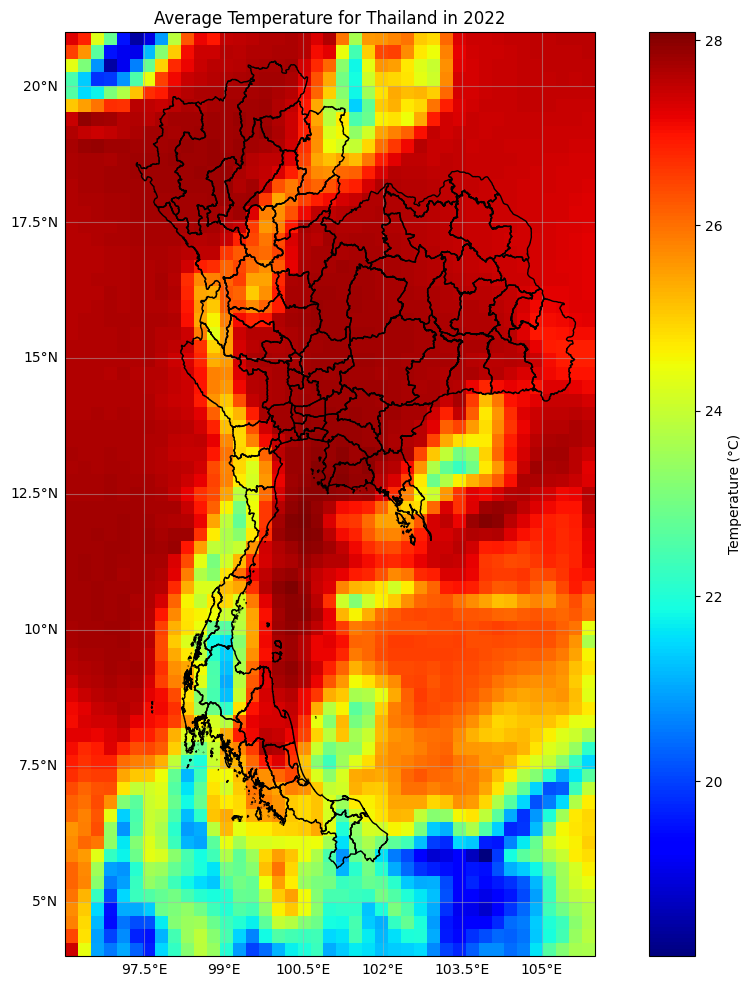

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc')
data_var = ds['mx2t']

# แปลงคอลัมน์ 'time' ให้เป็นวันที่
ds['time'] = pd.to_datetime(ds['time'].values)

# เฉลี่ยข้อมูลรายวันเป็นรายปี
data_yearly_avg = data_var.resample(time='Y').mean()

# เลือกช่วงปีที่ต้องการ
year = 2022
temp = data_yearly_avg.sel(latitude=slice(21, 4), longitude=slice(96, 106), time=str(year))

# ตรวจสอบว่ามีข้อมูลหรือไม่
if temp.size == 0:
    print("ไม่มีข้อมูลสำหรับปีที่เลือก")
else:
    # แปลงข้อมูลจากเคลวินเป็นเซลเซียส
    data_avg = temp.mean(dim='time') - 273.15

    x = temp.longitude
    y = temp.latitude

    # สร้าง plot และตั้งค่าพารามิเตอร์พื้นฐาน
    fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})

    # แสดงอุณหภูมิ
    mp = ax.imshow(data_avg, extent=(x.min(), x.max(), y.min(), y.max()), cmap='jet', origin='lower', interpolation='none')

    # ตั้งค่าแสดงผลของพิกัดในประเทศไทย
    ax.set_extent([96, 106, 4, 21], crs=ccrs.PlateCarree())

    # เพิ่ม gridlines ให้ชัดเจนขึ้น
    gl = ax.gridlines(draw_labels=True, alpha=0.5)  # ความโปร่งใสของเส้นกริด
    gl.top_labels = False
    gl.right_labels = False

    # วาดขอบเขตของประเทศไทย
    gdf = gpd.read_file("../Geo-data/shapefile-lv1-thailand.json")
    gdf.geometry.boundary.plot(ax=ax, color='black', linewidth=1)  # ความหนาของเส้น boundary

    plt.title(f'Average Temperature for Thailand in {year}', fontsize=12)
    plt.colorbar(mp, label='Temperature (°C)')

    # แสดงผล
    plt.show()




In [ ]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import geopandas as gpd  # นำเข้า geopandas

# โหลดข้อมูล NetCDF
ds = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
data_var = ds.metpy.parse_cf('mx2t')

# แปลงคอลัมน์ 'time' ให้เป็นวันที่
ds['time'] = pd.to_datetime(ds['time'].values)

# เลือกข้อมูลตามช่วงเวลา
data_filtered = ds.sel(time=slice('2000-01-01', '2005-12-31'))

# โหลดข้อมูล shapefile
gdf = gpd.read_file("../Geo-data/thailand-Geo.json")

# สร้าง plot และตั้งค่าพารามิเตอร์พื้นฐาน
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

for i, year in enumerate(range(2000, 2006)):
    # เลือกข้อมูลตามปี
    data_year = data_filtered.sel(time=str(year))

    # คำนวณค่าเฉลี่ยรายปีของอุณหภูมิสูงสุด และแปลงเป็นเซลเซียส
    data_avg = data_year['mx2t'].mean(dim='time') - 273.15

    # ค่าเฉลี่ยอุณหภูมิโลก
    global_avg_temp = data_avg.mean().item()

    x = data_avg.longitude
    y = data_avg.latitude

    ax = axs[i]
    # แสดงอุณหภูมิสูงสุด
    mp = ax.imshow(data_avg, extent=(x.min(), x.max(), y.min(), y.max()), cmap='jet', origin='lower')

    # เพิ่ม shapefile ลงใน plot
    gdf.boundary.plot(ax=ax, color='black', linewidth=1)

    ax.set_title(f'Temperature heatmap ({year})', fontsize=14)

    # แสดงค่าเฉลี่ยอุณหภูมิ
    ax.text(0.05, 0.1, f'Avg Temp: {global_avg_temp:.2f}°C',
            transform=ax.transAxes, fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.7))

    # เพิ่ม gridlines
    gl = ax.gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

plt.tight_layout()
plt.show()





In [5]:
import pandas as pd
import xarray as xr
import json

# โหลดข้อมูล NetCDF
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon_step = float(ds_tmax['longitude'][1] - ds_tmax['longitude'][0])
lat_step = float(ds_tmax['latitude'][1] - ds_tmax['latitude'][0])

# สร้างข้อมูล GeoJSON สำหรับแต่ละปีในช่วง 1960-1965
for year in range(1960, 1966):
    # เลือกข้อมูลตามปี
    data_tmax_year = ds_tmax.sel(time=str(year))
    data_tmin_year = ds_tmin.sel(time=str(year))
    data_pr_year = ds_pr.sel(time=str(year))
    
    # คำนวณค่าเฉลี่ยรายเดือนและแปลงเป็นเซลเซียส (สำหรับ tmax และ tmin)
    tmax_monthly_mean = (data_tmax_year['mx2t'].resample(time='M').mean() - 273.15)
    tmin_monthly_mean = (data_tmin_year['mn2t'].resample(time='M').mean() - 273.15)
    
    # คำนวณผลรวมรายเดือนของปริมาณน้ำฝน (ต้องคูณด้วยจำนวนวันในเดือนนั้น)
    pr_monthly_sum = data_pr_year['tp'].resample(time='M').sum() * 1000  # คูณ 1000 เพื่อแปลงจาก m เป็น mm

    # สร้างข้อมูล GeoJSON
    features = []
    lon, lat = tmax_monthly_mean['longitude'].values, tmax_monthly_mean['latitude'].values

    for month_idx, month in enumerate(tmax_monthly_mean['time'].values):
        tmax_values = tmax_monthly_mean.isel(time=month_idx).values
        tmin_values = tmin_monthly_mean.isel(time=month_idx).values
        pr_values = pr_monthly_sum.isel(time=month_idx).values

        for i, lon_value in enumerate(lon):
            for j, lat_value in enumerate(lat):
                tmax = tmax_values[j, i]
                tmin = tmin_values[j, i]
                pr = pr_values[j, i]

                if not pd.isnull(tmax) and not pd.isnull(tmin) and not pd.isnull(pr):
                    grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
                    features.append({
                        "type": "Feature",
                        "geometry": {
                            "type": "Polygon",
                            "coordinates": [grid_polygon]
                        },
                        "properties": {
                            "tmax": float(tmax),
                            "tmin": float(tmin),
                            "pre": float(pr),  # ผลรวมปริมาณน้ำฝนรายเดือนในหน่วย mm
                            "month": pd.Timestamp(month).month
                        }
                    })

    # สร้างโครงสร้าง GeoJSON
    geojson_data = {
        "type": "FeatureCollection",
        "features": features
    }

    # บันทึกข้อมูลเป็นไฟล์ GeoJSON
    output_file = f"../Geo-data/Era-Dataset/era_data_grid_{year}.json"
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(geojson_data, f, ensure_ascii=False, indent=4)

    print(f"ข้อมูลปี {year} ถูกบันทึกในไฟล์ {output_file}")




C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


ข้อมูลปี 1960 ถูกบันทึกในไฟล์ ../Geo-data/Era-Dataset/era_data_grid_1960.json


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


ข้อมูลปี 1961 ถูกบันทึกในไฟล์ ../Geo-data/Era-Dataset/era_data_grid_1961.json


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


ข้อมูลปี 1962 ถูกบันทึกในไฟล์ ../Geo-data/Era-Dataset/era_data_grid_1962.json


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


ข้อมูลปี 1963 ถูกบันทึกในไฟล์ ../Geo-data/Era-Dataset/era_data_grid_1963.json


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


ข้อมูลปี 1964 ถูกบันทึกในไฟล์ ../Geo-data/Era-Dataset/era_data_grid_1964.json


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


ข้อมูลปี 1965 ถูกบันทึกในไฟล์ ../Geo-data/Era-Dataset/era_data_grid_1965.json


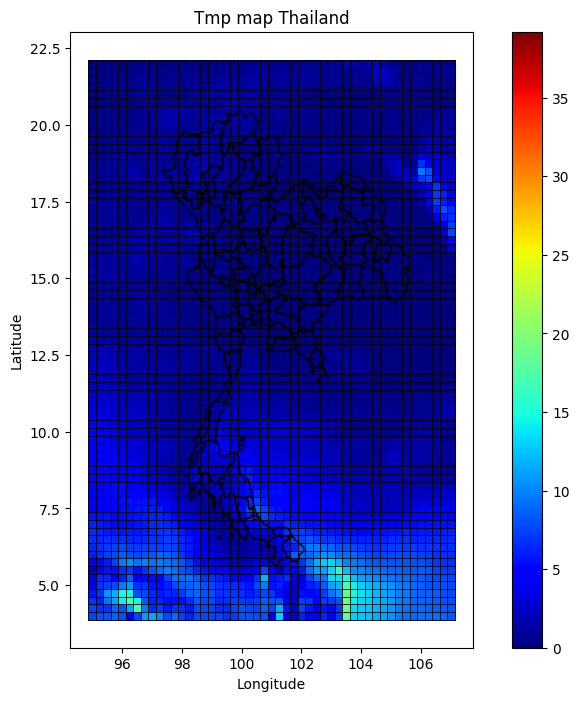

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/Era-Dataset/era_data_grid_1960.json')
shapefile = gpd.read_file('../Geo-data/thailand-Geo.json')

# สร้าง plot
fig, ax = plt.subplots(figsize=(10, 8))

# แสดงผลข้อมูลพื้นที่ด้วย GeoPandas
data.plot(column='pre', cmap='jet', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

shapefile.geometry.boundary.plot(ax=ax, color='black', linewidth=1)

# ปรับแต่งการแสดงผลเพิ่มเติม
plt.title('Tmp map Thailand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()